# Exploratory Data Analysis 
Stack overflow Survey Data

In [2]:
import os

In [3]:
os.listdir('stackoverflow-developer-survey-2020')

['.ipynb_checkpoints',
 'survey_results_public.csv',
 'survey_results_schema.csv']

In [4]:
import pandas as pd

In [5]:
survey_raw_df = pd.read_csv('stackoverflow-developer-survey-2020/survey_results_public.csv')

In [6]:
survey_raw_df

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,...,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
0,1,I am a developer by profession,Yes,NaN,13,Monthly,NaN,NaN,Germany,European Euro,...,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or sof...",ASP.NET Core,ASP.NET;ASP.NET Core,Just as welcome now as I felt last year,50.0,36,27
1,2,I am a developer by profession,No,NaN,19,NaN,NaN,NaN,United Kingdom,Pound sterling,...,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat more welcome now than last year,NaN,7,4
2,3,I code primarily as a hobby,Yes,NaN,15,NaN,NaN,NaN,Russian Federation,NaN,...,Neither easy nor difficult,Appropriate in length,NaN,NaN,NaN,NaN,Somewhat more welcome now than last year,NaN,4,NaN
3,4,I am a developer by profession,Yes,25.0,18,NaN,NaN,NaN,Albania,Albanian lek,...,NaN,NaN,No,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat less welcome now than last year,40.0,7,4
4,5,"I used to be a developer by profession, but no...",Yes,31.0,16,NaN,NaN,NaN,United States,NaN,...,Easy,Too short,No,"Computer science, computer engineering, or sof...",Django;Ruby on Rails,Ruby on Rails,Just as welcome now as I felt last year,NaN,15,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64456,64858,NaN,Yes,NaN,16,NaN,NaN,NaN,United States,NaN,...,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,NaN,NaN,10,Less than 1 year
64457,64867,NaN,Yes,NaN,NaN,NaN,NaN,NaN,Morocco,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64458,64898,NaN,Yes,NaN,NaN,NaN,NaN,NaN,Viet Nam,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64459,64925,NaN,Yes,NaN,NaN,NaN,NaN,NaN,Poland,NaN,...,NaN,NaN,NaN,NaN,Angular;Angular.js;React.js,NaN,NaN,NaN,NaN,NaN


In [7]:
survey_raw_df.columns

Index(['Respondent', 'MainBranch', 'Hobbyist', 'Age', 'Age1stCode', 'CompFreq',
       'CompTotal', 'ConvertedComp', 'Country', 'CurrencyDesc',
       'CurrencySymbol', 'DatabaseDesireNextYear', 'DatabaseWorkedWith',
       'DevType', 'EdLevel', 'Employment', 'Ethnicity', 'Gender', 'JobFactors',
       'JobSat', 'JobSeek', 'LanguageDesireNextYear', 'LanguageWorkedWith',
       'MiscTechDesireNextYear', 'MiscTechWorkedWith',
       'NEWCollabToolsDesireNextYear', 'NEWCollabToolsWorkedWith', 'NEWDevOps',
       'NEWDevOpsImpt', 'NEWEdImpt', 'NEWJobHunt', 'NEWJobHuntResearch',
       'NEWLearn', 'NEWOffTopic', 'NEWOnboardGood', 'NEWOtherComms',
       'NEWOvertime', 'NEWPurchaseResearch', 'NEWPurpleLink', 'NEWSOSites',
       'NEWStuck', 'OpSys', 'OrgSize', 'PlatformDesireNextYear',
       'PlatformWorkedWith', 'PurchaseWhat', 'Sexuality', 'SOAccount',
       'SOComm', 'SOPartFreq', 'SOVisitFreq', 'SurveyEase', 'SurveyLength',
       'Trans', 'UndergradMajor', 'WebframeDesireNextYear',
  

In [8]:
schema_fname = 'stackoverflow-developer-survey-2020/survey_results_schema.csv'

In [9]:
pd.read_csv(schema_fname, index_col = 'Column').QuestionText

Column
Respondent            Randomized respondent ID number (not in order ...
MainBranch            Which of the following options best describes ...
Hobbyist                                        Do you code as a hobby?
Age                   What is your age (in years)? If you prefer not...
Age1stCode            At what age did you write your first line of c...
                                            ...                        
WebframeWorkedWith    Which web frameworks have you done extensive d...
WelcomeChange         Compared to last year, how welcome do you feel...
WorkWeekHrs           On average, how many hours per week do you wor...
YearsCode             Including any education, how many years have y...
YearsCodePro          NOT including education, how many years have y...
Name: QuestionText, Length: 61, dtype: object

We can now use schema_raw to retrieve the full questions text for any column in survey_raw_df

In [10]:
schema_raw = pd.read_csv(schema_fname, index_col = 'Column').QuestionText

In [11]:
schema_raw['Hobbyist']

'Do you code as a hobby?'

In [12]:
schema_raw['WorkWeekHrs']

'On average, how many hours per week do you work? Please enter a whole number in the box.'

Uptil now we'have loaded the dataset and now we'll perform next step of preprocessing and cleaning data for analysis

# Data Preparation & Cleaning
Since survey responses contain wealth of information, we'll limit our analysis to following area:
- Demographics on survey respondent & global programming community
- Distribution of programming skills and experience
- Employment- related information, preferences and opinions.

In [13]:
selected_columns = [
    # Demographics
    'Country',
    'Age',
    'Gender',
    'EdLevel',
    'UndergradMajor',
    # Programming experiences
    'Hobbyist',
    'Age1stCode',
    'YearsCode',
    'YearsCodePro',
    'LanguageWorkedWith',
    'LanguageDesireNextYear',
    'NEWLearn',
    'NEWStuck',
    # Employment
    'Employment',
    'DevType',
    'WorkWeekHrs',
    'JobSat',
    'JobFactors',
    'NEWOvertime',
    'NEWEdImpt'
]

In [14]:
schema_raw[ 'Country']

'Where do you live?'

In [15]:
schema_raw['Age' ]

'What is your age (in years)? If you prefer not to answer, you may leave this question blank.'

In [16]:
schema_raw['Gender' ]

'Which of the following describe you, if any? Please check all that apply. If you prefer not to answer, you may leave this question blank.'

In [17]:
schema_raw['EdLevel' ]

'Which of the following best describes the highest level of formal education that you’ve completed?'

In [18]:
schema_raw['UndergradMajor' ]

'What was your primary field of study?'

In [19]:
schema_raw['Hobbyist' ]

'Do you code as a hobby?'

In [20]:
len(selected_columns)

20

extra copy of data from these columns into new data frame survey_df , which we can modify without affecting original data

In [21]:
survey_df = survey_raw_df[selected_columns].copy()

In [22]:
schema = schema_raw[selected_columns] # display only those 20 columns which we selected 

In [23]:
survey_df

,Country,Age,Gender,EdLevel,UndergradMajor,Hobbyist,Age1stCode,YearsCode,YearsCodePro,LanguageWorkedWith,LanguageDesireNextYear,NEWLearn,NEWStuck,Employment,DevType,WorkWeekHrs,JobSat,JobFactors,NEWOvertime,NEWEdImpt
0,Germany,NaN,Man,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",Yes,13,36,27,C#;HTML/CSS;JavaScript,C#;HTML/CSS;JavaScript,Once a year,Visit Stack Overflow;Go for a walk or other ph...,"Independent contractor, freelancer, or self-em...","Developer, desktop or enterprise applications;...",50.0,Slightly satisfied,"Languages, frameworks, and other technologies ...",Often: 1-2 days per week or more,Fairly important
1,United Kingdom,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",No,19,7,4,JavaScript;Swift,Python;Swift,Once a year,Visit Stack Overflow;Go for a walk or other ph...,Employed full-time,"Developer, full-stack;Developer, mobile",NaN,Very dissatisfied,NaN,NaN,Fairly important
2,Russian Federation,NaN,NaN,NaN,NaN,Yes,15,4,NaN,Objective-C;Python;Swift,Objective-C;Python;Swift,Once a decade,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Albania,25.0,Man,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",Yes,18,7,4,NaN,NaN,Once a year,NaN,NaN,NaN,40.0,Slightly dissatisfied,Flex time or a flexible schedule;Office enviro...,Occasionally: 1-2 days per quarter but less th...,Not at all important/not necessary
4,United States,31.0,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",Yes,16,15,8,HTML/CSS;Ruby;SQL,Java;Ruby;Scala,Once a year,Call a coworker or friend;Visit Stack Overflow...,Employed full-time,NaN,NaN,NaN,NaN,NaN,Very important
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64456,United States,NaN,NaN,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",Yes,16,10,Less than 1 year,NaN,NaN,Once a decade,Call a coworker or friend,Employed full-time,Senior executive/VP,NaN,NaN,NaN,NaN,Very important
64457,Morocco,NaN,NaN,NaN,NaN,Yes,NaN,NaN,NaN,Assembly;Bash/Shell/PowerShell;C;C#;C++;Dart;G...,Assembly;Bash/Shell/PowerShell;C;C#;C++;Dart;G...,NaN,NaN,Employed full-time,NaN,NaN,NaN,NaN,NaN,NaN
64458,Viet Nam,NaN,NaN,Primary/elementary school,NaN,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64459,Poland,NaN,NaN,NaN,NaN,Yes,NaN,NaN,NaN,HTML/CSS,HTML/CSS;Java;JavaScript,Once a year,Call a coworker or friend;Visit Stack Overflow,Employed full-time,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
schema

Column
Country                                                  Where do you live?
Age                       What is your age (in years)? If you prefer not...
Gender                    Which of the following describe you, if any? P...
EdLevel                   Which of the following best describes the high...
UndergradMajor                        What was your primary field of study?
Hobbyist                                            Do you code as a hobby?
Age1stCode                At what age did you write your first line of c...
YearsCode                 Including any education, how many years have y...
YearsCodePro              NOT including education, how many years have y...
LanguageWorkedWith        Which programming, scripting, and markup langu...
LanguageDesireNextYear    Which programming, scripting, and markup langu...
NEWLearn                  How frequently do you learn a new language or ...
NEWStuck                  What do you do when you get stuck on a problem...
Emplo

In [25]:
schema.shape

(20,)

In [26]:
survey_df.shape

(64461, 20)

In [27]:
survey_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64461 entries, 0 to 64460
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country                 64072 non-null  object 
 1   Age                     45446 non-null  float64
 2   Gender                  50557 non-null  object 
 3   EdLevel                 57431 non-null  object 
 4   UndergradMajor          50995 non-null  object 
 5   Hobbyist                64416 non-null  object 
 6   Age1stCode              57900 non-null  object 
 7   YearsCode               57684 non-null  object 
 8   YearsCodePro            46349 non-null  object 
 9   LanguageWorkedWith      57378 non-null  object 
 10  LanguageDesireNextYear  54113 non-null  object 
 11  NEWLearn                56156 non-null  object 
 12  NEWStuck                54983 non-null  object 
 13  Employment              63854 non-null  object 
 14  DevType                 49370 non-null

Most of the columns have datatype object, either because they contain different values or empty values which are represented using NaN. 
It appears that every column contains some empty values since the Non-Null count for every column is lower than the total number of rows (64461). We'll need to deal with empty values and manually adjust the data type for each column on a case-by-case basis.

Only two of the columns were detected as numeric columns (Age and WorkWeekHrs), even though a few other columns have mostly numeric values. To make our analysis easier, let's convert some other columns into numeric data types while ignoring any non-numeric value. The non-numeric are converted to NaN.

In [28]:
schema.Age1stCode

'At what age did you write your first line of code or program? (e.g., webpage, Hello World, Scratch project)'

In [29]:
survey_df.Age1stCode.unique()

array(['13', '19', '15', '18', '16', '14', '12', '20', '42', '8', '25',
       '22', '30', '17', '21', '10', '46', '9', '7', '11', '6', nan, '31',
       '29', '5', 'Younger than 5 years', '28', '38', '23', '27', '41',
       '24', '53', '26', '35', '32', '40', '33', '36', '54', '48', '56',
       '45', '44', '34', 'Older than 85', '39', '51', '68', '50', '37',
       '47', '43', '52', '85', '64', '55', '58', '49', '76', '72', '73',
       '83', '63'], dtype=object)

In [30]:
schema.YearsCode

'Including any education, how many years have you been coding in total?'

In [31]:
survey_df.YearsCode.unique()

array(['36', '7', '4', '15', '6', '17', '8', '10', '35', '5', '37', '19',
       '9', '22', '30', '23', '20', '2', 'Less than 1 year', '3', '13',
       '25', '16', '43', '11', '38', '33', nan, '24', '21', '12', '40',
       '27', '50', '46', '14', '18', '28', '32', '44', '26', '42', '31',
       '34', '29', '1', '39', '41', '45', 'More than 50 years', '47',
       '49', '48'], dtype=object)

In [32]:
schema.YearsCodePro

'NOT including education, how many years have you coded professionally (as a part of your work)?'

In [33]:
survey_df.YearsCodePro.unique()

array(['27', '4', nan, '8', '13', '2', '7', '20', '1', '23', '3', '12',
       '17', '18', '10', '14', '29', '6', '28', '9', '15', '11', '16',
       '25', 'Less than 1 year', '5', '21', '19', '35', '24', '32', '22',
       '30', '38', '26', '40', '33', '31', 'More than 50 years', '34',
       '36', '39', '37', '41', '45', '47', '42', '46', '50', '43', '44',
       '48', '49'], dtype=object)

Since many values are not of numeric type so we'll convert that non numeric vlaues with NaN.

In [34]:
survey_df['Age1stCode'] = pd.to_numeric(survey_df.Age1stCode, errors= 'coerce')
survey_df['YearsCode'] = pd.to_numeric(survey_df.YearsCode, errors= 'coerce')
survey_df['YearsCodePro'] = pd.to_numeric(survey_df.YearsCodePro, errors= 'coerce')

Lets now view some basic statistics about numeric coulumns

In [35]:
survey_df.describe()

,Age,Age1stCode,YearsCode,YearsCodePro,WorkWeekHrs
count,45446.000000,57473.000000,56784.000000,44133.000000,41151.000000
mean,30.834111,15.476572,12.782051,8.869667,40.782174
std,9.585392,5.114081,9.490657,7.759961,17.816383
min,1.000000,5.000000,1.000000,1.000000,1.000000
25%,24.000000,12.000000,6.000000,3.000000,40.000000
50%,29.000000,15.000000,10.000000,6.000000,40.000000
75%,35.000000,18.000000,17.000000,12.000000,44.000000
max,279.000000,85.000000,50.000000,50.000000,475.000000


There is problem with age col ,as min age is 1 and max is 279 .This is the common issue with surveys: responses may contain invalid values due to accidental or intentional errors while responding. A simple fix would be ognore the rows like where  values in age column is higher than 100 years and lower than 10 years as invalid survey responses which we are going to do by .drop method

In [36]:
survey_df.drop(survey_df[survey_df.Age < 10].index , inplace = True)
survey_df.drop(survey_df[survey_df.Age > 100].index , inplace = True)

Same hold true for workWeek hrs. let's ignore the entities where value for column is higher than 140 hrs(~20hrs per day)

In [37]:
survey_df.drop(survey_df[survey_df.WorkWeekHrs > 140].index, inplace = True)

The gender column also allows picking multiple options, for our analysis we'll ignore the values containing more than one option

In [38]:
schema.Gender

'Which of the following describe you, if any? Please check all that apply. If you prefer not to answer, you may leave this question blank.'

In [39]:
survey_df['Gender'].value_counts()

Gender
Man                                                            45895
Woman                                                           3835
Non-binary, genderqueer, or gender non-conforming                385
Man;Non-binary, genderqueer, or gender non-conforming            121
Woman;Non-binary, genderqueer, or gender non-conforming           92
Woman;Man                                                         73
Woman;Man;Non-binary, genderqueer, or gender non-conforming       25
Name: count, dtype: int64

We need to ignore the values which have multiple option chosn 

In [40]:
import numpy as np

In [41]:
survey_df.where(~(survey_df.Gender.str.contains(';', na = False)), np.nan , inplace= True)

In [42]:
survey_df['Gender'].value_counts()

Gender
Man                                                  45895
Woman                                                 3835
Non-binary, genderqueer, or gender non-conforming      385
Name: count, dtype: int64

We'have now cleaned up and prepared the dataset for analysis . lets look at sample of rows from data frame

In [43]:
survey_df.sample(10)

,Country,Age,Gender,EdLevel,UndergradMajor,Hobbyist,Age1stCode,YearsCode,YearsCodePro,LanguageWorkedWith,LanguageDesireNextYear,NEWLearn,NEWStuck,Employment,DevType,WorkWeekHrs,JobSat,JobFactors,NEWOvertime,NEWEdImpt
20931,Pakistan,24.0,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",No,18.0,5.0,1.0,HTML/CSS;JavaScript;Python;SQL,Java;Scala,Every few months,Call a coworker or friend;Visit Stack Overflow...,Employed full-time,"Developer, back-end;Developer, front-end;Devel...",40.0,Slightly satisfied,Flex time or a flexible schedule;Financial per...,Often: 1-2 days per week or more,Very important
53731,Singapore,62.0,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",Yes,18.0,30.0,8.0,Assembly;Python;SQL,Python;SQL,Once a decade,Visit Stack Overflow;Visit another developer c...,Employed full-time,NaN,NaN,NaN,NaN,NaN,Very important
7435,India,29.0,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",Yes,19.0,10.0,5.0,HTML/CSS;JavaScript;PHP;TypeScript,HTML/CSS;JavaScript;PHP;TypeScript,Once every few years,Visit Stack Overflow;Do other work and come ba...,Employed full-time,"Developer, back-end;Developer, front-end;Devel...",40.0,Very dissatisfied,Flex time or a flexible schedule;Remote work o...,Occasionally: 1-2 days per quarter but less th...,Very important
1566,United States,NaN,Man,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Another engineering discipline (such as civil,...",No,18.0,9.0,4.0,HTML/CSS;Java;JavaScript;SQL;TypeScript,Java;Kotlin;Python,Once every few years,Call a coworker or friend;Visit Stack Overflow,Employed full-time,"Developer, full-stack",NaN,Neither satisfied nor dissatisfied,"Languages, frameworks, and other technologies ...",Sometimes: 1-2 days per month but less than we...,Very important
29528,Saudi Arabia,35.0,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","A health science (such as nursing, pharmacy, r...",Yes,11.0,6.0,NaN,Java;Python,Java;Kotlin;Python,Once every few years,Visit Stack Overflow;Watch help / tutorial videos,Employed full-time,NaN,NaN,NaN,NaN,NaN,Not at all important/not necessary
53317,Taiwan,26.0,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",Yes,17.0,8.0,3.0,C#;C++;HTML/CSS;Java;JavaScript;PHP;SQL,C#;HTML/CSS;JavaScript;Kotlin;Python;TypeScript,Every few months,Call a coworker or friend;Visit Stack Overflow...,Employed full-time,"Developer, desktop or enterprise applications;...",40.0,Neither satisfied nor dissatisfied,"Languages, frameworks, and other technologies ...",Sometimes: 1-2 days per month but less than we...,Very important
5444,United States,34.0,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","A natural science (such as biology, chemistry,...",Yes,14.0,10.0,4.0,C#;HTML/CSS;JavaScript;PHP;Python;SQL;TypeScript,Go;HTML/CSS;JavaScript;SQL;TypeScript,Every few months,Call a coworker or friend;Visit Stack Overflow...,Employed full-time,"Academic researcher;Developer, desktop or ente...",40.0,Very dissatisfied,"Flex time or a flexible schedule;Languages, fr...",Occasionally: 1-2 days per quarter but less th...,Somewhat important
10793,South Africa,42.0,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Information systems, information technology, o...",Yes,7.0,30.0,21.0,C#;JavaScript,C#;Go;JavaScript;R,Every few months,Call a coworker or friend;Go for a walk or oth...,Employed full-time,"Developer, desktop or enterprise applications;...",45.0,Slightly dissatisfied,Flex time or a flexible schedule;Remote work o...,Often: 1-2 days per week or more,Very important
23193,Australia,30.0,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Information systems, information technology, o...",Yes,10.0,20.0,7.0,TypeScript,C#;TypeScript,Once every few years,Go for a walk or other physical activity;Panic...,Employed full-time,"Developer, back-end;Developer, full-sta

# Exploratory Analysis and Visualization
what the demographics i.e. country , age, gender, education level, employement level etc of the respondents look like

In [44]:
!pip install seaborn

In [45]:
pip install --upgrade pip

Note: you may need to restart the kernel to use updated packages.


In [46]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9,5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

# Country
lets look at no. of countries from which rsponses in survey and plot 10 countries with highest number of responses

In [47]:
schema.Country

'Where do you live?'

In [48]:
survey_df.Country.nunique()

183

countries with highest number of  respondents using value counts method

In [49]:
survey_df.Country.value_counts()

Country
United States          12371
India                   8364
United Kingdom          3881
Germany                 3864
Canada                  2175
                       ...  
Nauru                      1
Lesotho                    1
Saint Lucia                1
Antigua and Barbuda        1
Marshall Islands           1
Name: count, Length: 183, dtype: int64

In [50]:
top_countries = survey_df.Country.value_counts().head(15)
top_countries

Country
United States         12371
India                  8364
United Kingdom         3881
Germany                3864
Canada                 2175
France                 1884
Brazil                 1804
Netherlands            1332
Poland                 1259
Australia              1199
Spain                  1157
Italy                  1115
Russian Federation     1085
Sweden                  879
Pakistan                802
Name: count, dtype: int64

visualise using bar chart

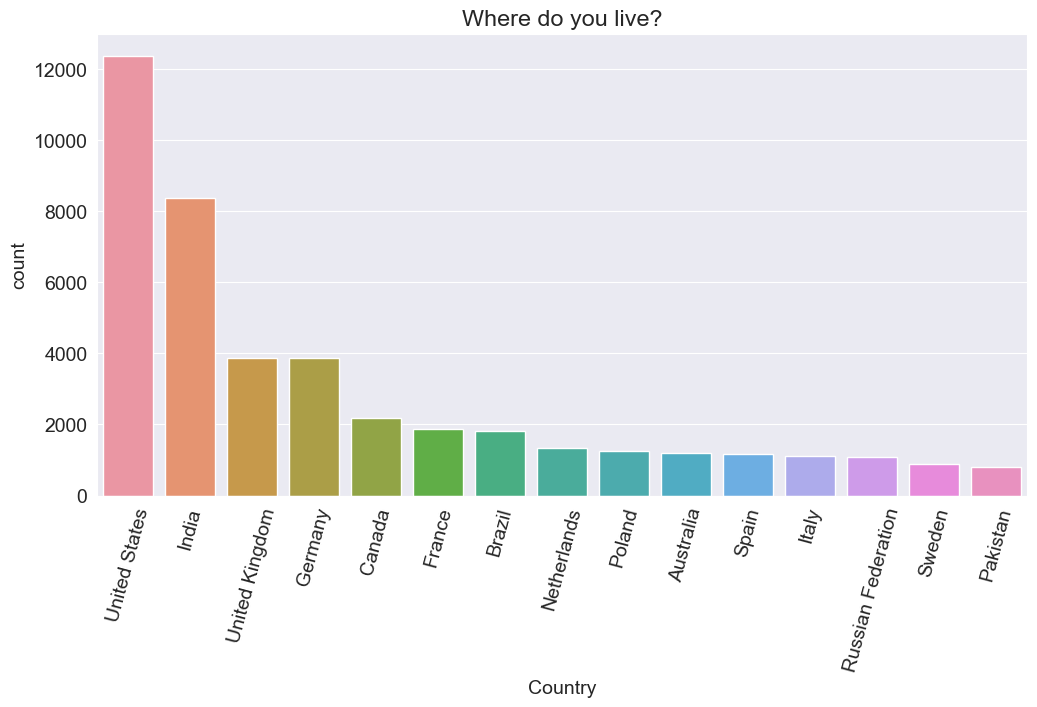

In [51]:
plt.figure(figsize=(12,6))
plt.xticks(rotation=75)
plt.title(schema.Country)
sns.barplot(x=top_countries.index, y=top_countries);

High number of respondents are from USA and India- which one might expect that these countries have the highest populations and the survey is in english which is commonly used langusge used by professonals in USA . India and UK 

# Age
Age is an important factor to look at and we can use histogram to visualise it.

In [52]:
schema.Age

'What is your age (in years)? If you prefer not to answer, you may leave this question blank.'

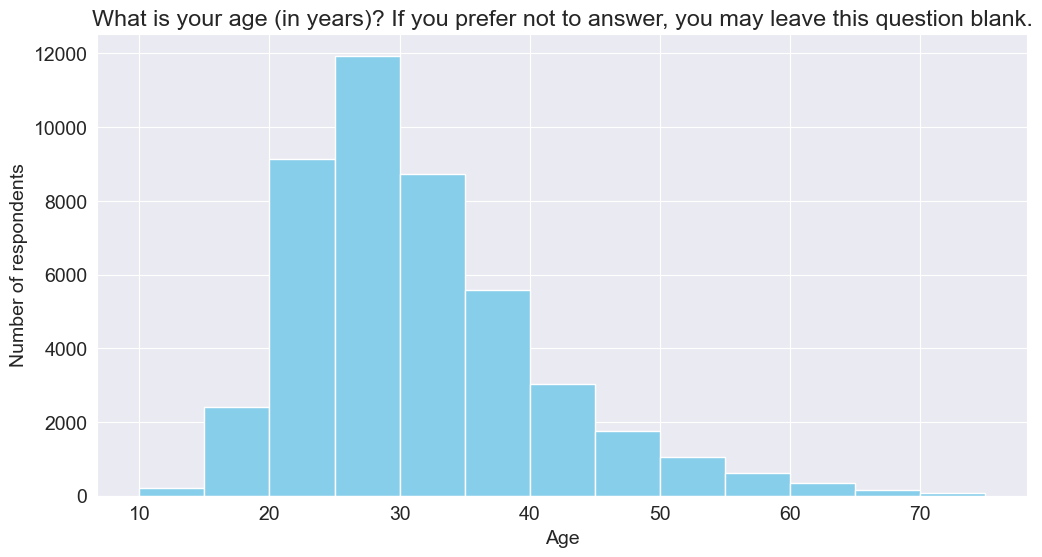

In [53]:
plt.figure(figsize = (12,6))
plt.title(schema.Age)
plt.xlabel('Age')
plt.ylabel('Number of respondents')

plt.hist(survey_df.Age, bins=np.arange(10,80,5), color = 'skyblue');

Most of the respondents are in age range of 20-45, which represents programming community in general , as most of the people taken up computer as field of study or profession in last 20 years

# Gender

Let's look at the distribution of responses for the Gender. It's a well-known fact that women and non-binary genders are underrepresented in the programming community, so we might expect to see a skewed distribution here.

In [54]:
schema.Gender

'Which of the following describe you, if any? Please check all that apply. If you prefer not to answer, you may leave this question blank.'

In [55]:
gender_counts = survey_df.Gender.value_counts()
gender_counts

Gender
Man                                                  45895
Woman                                                 3835
Non-binary, genderqueer, or gender non-conforming      385
Name: count, dtype: int64

A pie cahrt would be good way to visulaize the distribution

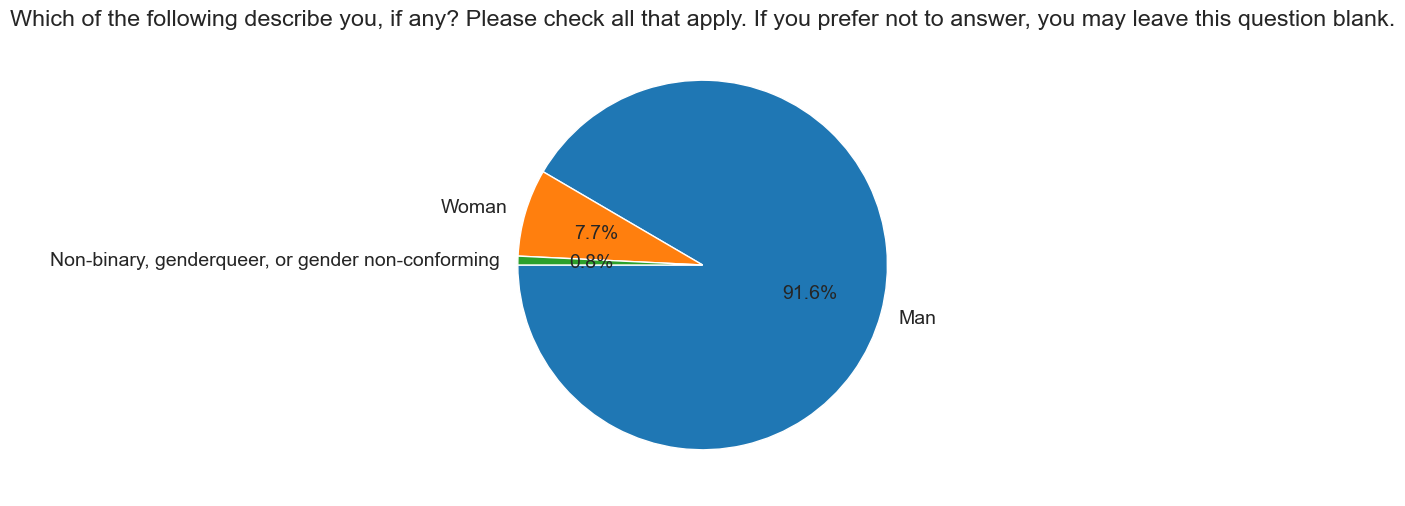

In [56]:
plt.figure(figsize=(12,6))
plt.title(schema.Gender)
plt.pie(gender_counts, labels = gender_counts.index, autopct = '%1.1f%%', startangle=180);


Only about 8% of survey respondents who have answered the question identify as women or non-binary. This number is lower than the overall percentage of women & non-binary genders in the programming community - which is estimated to be around 12%.

# Education 
Formal education in computer science is often considered an essential requirement for becoming a programmer. However, there are many free resources & tutorials available online to learn programming. Let's compare the education levels of respondents to gain some insight into this. We'll use a horizontal bar plot here.

In [57]:
schema.EdLevel

'Which of the following best describes the highest level of formal education that you’ve completed?'

In [58]:
survey_df.EdLevel.unique()

array(['Master’s degree (M.A., M.S., M.Eng., MBA, etc.)',
       'Bachelor’s degree (B.A., B.S., B.Eng., etc.)', nan,
       'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)',
       'Professional degree (JD, MD, etc.)',
       'Some college/university study without earning a degree',
       'Associate degree (A.A., A.S., etc.)',
       'Other doctoral degree (Ph.D., Ed.D., etc.)',
       'Primary/elementary school',
       'I never completed any formal education'], dtype=object)

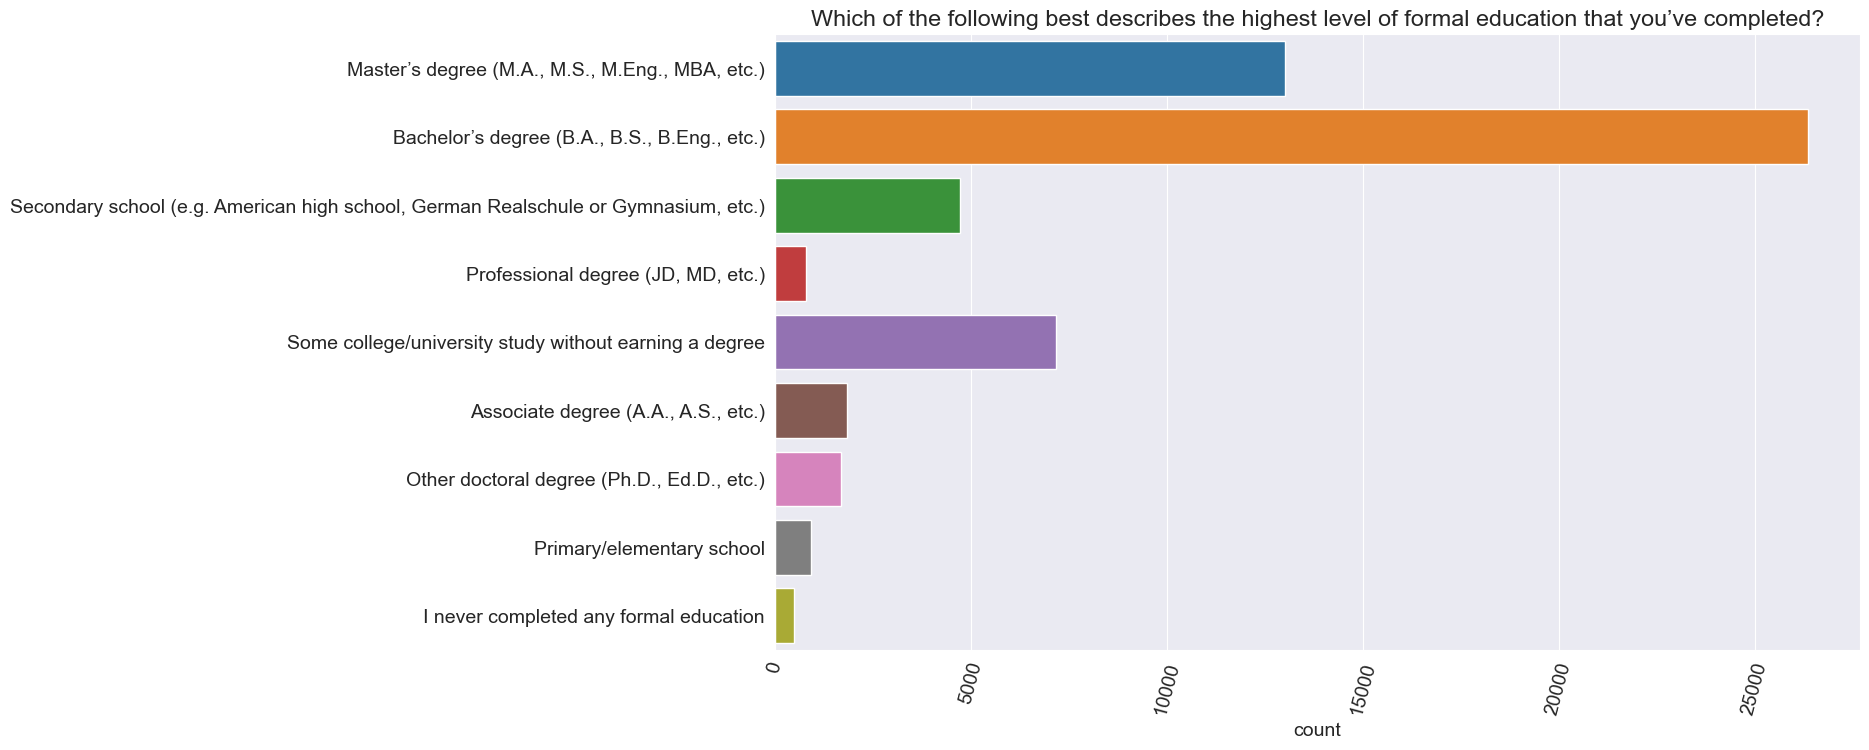

In [59]:
plt.figure(figsize= (14,8))
sns.countplot(y = survey_df.EdLevel)
plt.xticks(rotation = 75);
plt.title(schema['EdLevel'])
plt.ylabel(None);

It appears that well over half of the respondents hold a bachelor's or master's degree, so most programmers seem to have some college education. However, it's not clear from this graph alone if they hold a degree in computer science.

Let also plot undergraduate majors but this time we'll convert  numbers into percentages , and sort by percentages values to make it easier to visualise

In [60]:
schema.UndergradMajor

'What was your primary field of study?'

In [61]:
survey_df.UndergradMajor.value_counts() / survey_df.UndergradMajor.count()

UndergradMajor
Computer science, computer engineering, or software engineering                   0.619392
Another engineering discipline (such as civil, electrical, mechanical, etc.)      0.093542
Information systems, information technology, or system administration             0.079832
A natural science (such as biology, chemistry, physics, etc.)                     0.043166
Mathematics or statistics                                                         0.036271
Web development or web design                                                     0.035026
A business discipline (such as accounting, finance, marketing, etc.)              0.027006
A humanities discipline (such as literature, history, philosophy, etc.)           0.019696
A social science (such as anthropology, psychology, political science, etc.)      0.018215
Fine arts or performing arts (such as graphic design, music, studio art, etc.)    0.014125
I never declared a major                                                   

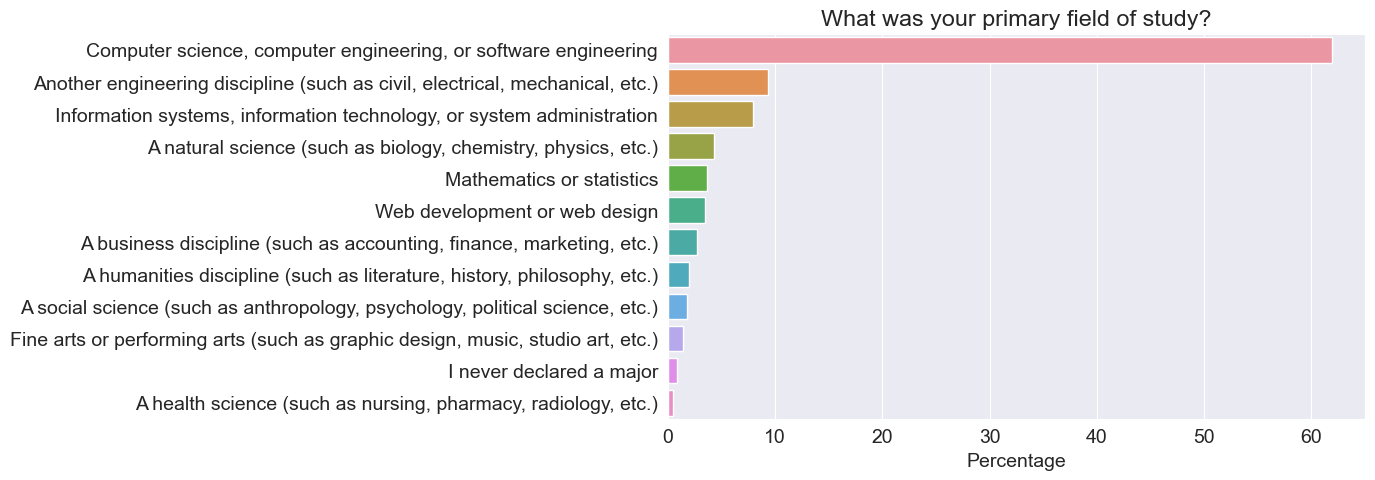

In [62]:
undergrad_pct = survey_df.UndergradMajor.value_counts() * 100 / survey_df.UndergradMajor.count()

sns.barplot(x=undergrad_pct, y=undergrad_pct.index)

plt.title(schema.UndergradMajor)
plt.ylabel(None);
plt.xlabel('Percentage');

It turns out that 40% of programmers holding a college degree have a field of study other than computer science - which is very encouraging. It seems to suggest that while a college education is helpful in general, you do not need to pursue a major in computer science to become a successful programmer.


# Employement
let's compare the breakdown between full time, part time and freelance work. lets visulalize data from Employement column

In [63]:
schema.Employment

'Which of the following best describes your current employment status?'

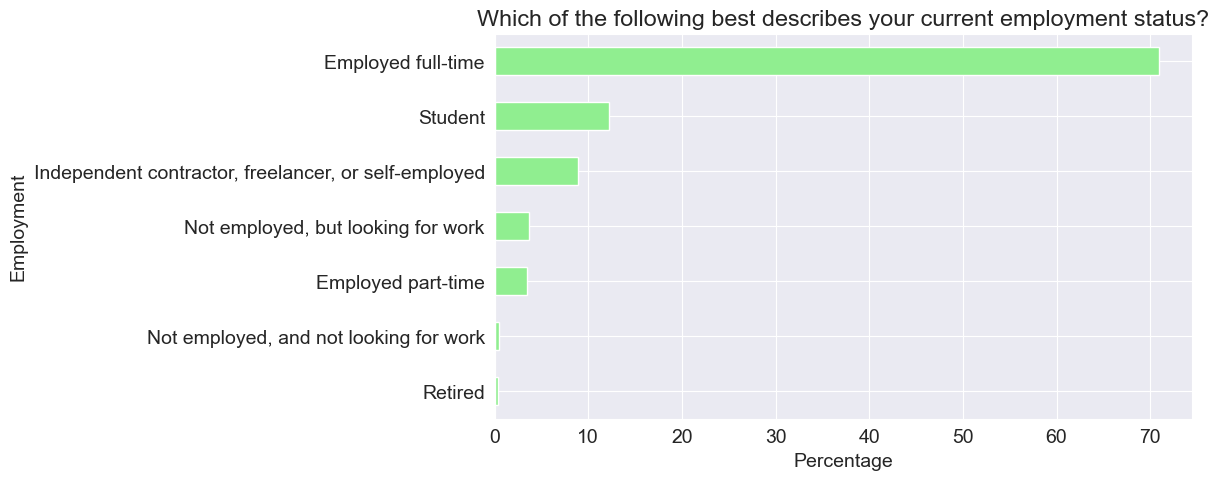

In [69]:
(survey_df.Employment.value_counts(normalize = True, ascending = True)*100).plot(kind= 'barh', color = 'lightgreen')
plt.title(schema.Employment)
plt.xlabel('Percentage');

It shows that close to 10% of respondents are employed part time or as freelancers.

The Devtype field contains information about roles held by respondents. Sice question allow multiple answers the column contain list of values separated by ; which is bit harder to analyse. 

In [70]:
schema.DevType

'Which of the following describe you? Please select all that apply.'

In [71]:
survey_df.DevType.value_counts()

DevType
Developer, full-stack                                                                                                                                                           4396
Developer, back-end                                                                                                                                                             3056
Developer, back-end;Developer, front-end;Developer, full-stack                                                                                                                  2214
Developer, back-end;Developer, full-stack                                                                                                                                       1465
Developer, front-end                                                                                                                                                            1390
                                                                                       

since the data is not clear so we might need to process it more.so let's define helper function which turns a column containing lists of values into data frame with one for each possible option.

In [72]:
survey_df.DevType

0        Developer, desktop or enterprise applications;...
1                  Developer, full-stack;Developer, mobile
2                                                      NaN
3                                                      NaN
4                                                      NaN
                               ...                        
64456                                  Senior executive/VP
64457                                                  NaN
64458                                                  NaN
64459                                                  NaN
64460                                                  NaN
Name: DevType, Length: 64306, dtype: object

In [84]:
def split_multicolumn(col_series):
    result_df = col_series.to_frame()
    options = []
    # Iterate over the column
    for idx, value  in col_series[col_series.notnull()].items():
        # Break each value into list of options
        for option in value.split(';'):
            # Add the option as a column to result
            if not option in result_df.columns:
                options.append(option)
                result_df[option] = False
            # Mark the value in the option column as True
            result_df.at[idx, option] = True
    return result_df[options]

In [85]:
dev_type_df = split_multicolumn(survey_df.DevType)

In [86]:
dev_type_df

,"Developer, desktop or enterprise applications","Developer, full-stack","Developer, mobile",Designer,"Developer, front-end","Developer, back-end","Developer, QA or test",DevOps specialist,"Developer, game or graphics",Database administrator,...,System administrator,Engineering manager,Product manager,Data or business analyst,Academic researcher,Data scientist or machine learning specialist,Scientist,Senior executive/VP,"Engineer, site reliability",Marketing or sales professional
0,True,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,True,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64456,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
64457,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
64458,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
64459,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


Now dev_type_df has one column for each option can be selected as response. if responded has selected the option , the value in column is true, otherwise false.
We can now use column wise total to identify most common roles.

In [88]:
dev_type_totals = dev_type_df.sum().sort_values(ascending = False)
dev_type_totals

Developer, back-end                              26996
Developer, full-stack                            26915
Developer, front-end                             18128
Developer, desktop or enterprise applications    11687
Developer, mobile                                 9406
DevOps specialist                                 5915
Database administrator                            5658
Designer                                          5262
System administrator                              5185
Developer, embedded applications or devices       4701
Data or business analyst                          3970
Data scientist or machine learning specialist     3939
Developer, QA or test                             3893
Engineer, data                                    3700
Academic researcher                               3502
Educator                                          2895
Developer, game or graphics                       2751
Engineering manager                               2699
Product ma

The most common roles includes "Developer" in the name.

# Asking and Answering Questions
We've already gained several insights about the respondents and the programming community by exploring individual columns of the dataset. Let's ask some specific questions and try to answer them using data frame operations and visualizations

### Which were the most popular programming languages i
we can use LanguageWorkedWith column, similar to DevType were allowed to choose multiple options

In [92]:
schema.LanguageWorkedWith

'Which programming, scripting, and markup languages have you done extensive development work in over the past year, and which do you want to work in over the next year? (If you both worked with the language and want to continue to do so, please check both boxes in that row.)'

In [93]:
# we also have language worked with desired next year
schema.LanguageDesireNextYear

'Which programming, scripting, and markup languages have you done extensive development work in over the past year, and which do you want to work in over the next year? (If you both worked with the language and want to continue to do so, please check both boxes in that row.)'

In [89]:
survey_df.LanguageWorkedWith

0                                   C#;HTML/CSS;JavaScript
1                                         JavaScript;Swift
2                                 Objective-C;Python;Swift
3                                                      NaN
4                                        HTML/CSS;Ruby;SQL
                               ...                        
64456                                                  NaN
64457    Assembly;Bash/Shell/PowerShell;C;C#;C++;Dart;G...
64458                                                  NaN
64459                                             HTML/CSS
64460                      C#;HTML/CSS;Java;JavaScript;SQL
Name: LanguageWorkedWith, Length: 64306, dtype: object

we'll split the column into data frame containing colukmn with each responses listed in options.

In [90]:
language_worked_df = split_multicolumn(survey_df.LanguageWorkedWith)

In [91]:
language_worked_df 

,C#,HTML/CSS,JavaScript,Swift,Objective-C,Python,Ruby,SQL,Java,PHP,...,VBA,Perl,Scala,C++,Go,Haskell,Rust,Dart,Julia,Assembly
0,True,True,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,True,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,True,True,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,True,False,False,False,False,True,True,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64456,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
64457,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
64458,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
64459,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


It appears 25 languages were included among options. let's identify the percentages who selected each languages

In [99]:
languages_worked_percentages = language_worked_df .mean().sort_values(ascending = False) * 100
languages_worked_percentages

JavaScript               59.893323
HTML/CSS                 55.801947
SQL                      48.444935
Python                   39.001026
Java                     35.618760
Bash/Shell/PowerShell    29.239884
C#                       27.803004
PHP                      23.130035
TypeScript               22.461357
C++                      21.114670
C                        19.236152
Go                        7.758219
Kotlin                    6.887382
Ruby                      6.229590
Assembly                  5.447392
VBA                       5.394520
Swift                     5.226573
R                         5.064846
Rust                      4.498803
Objective-C               3.603085
Dart                      3.517557
Scala                     3.150561
Perl                      2.757130
Haskell                   1.861413
Julia                     0.782198
dtype: float64

we can plot this inforamtion using horizontal bar chart

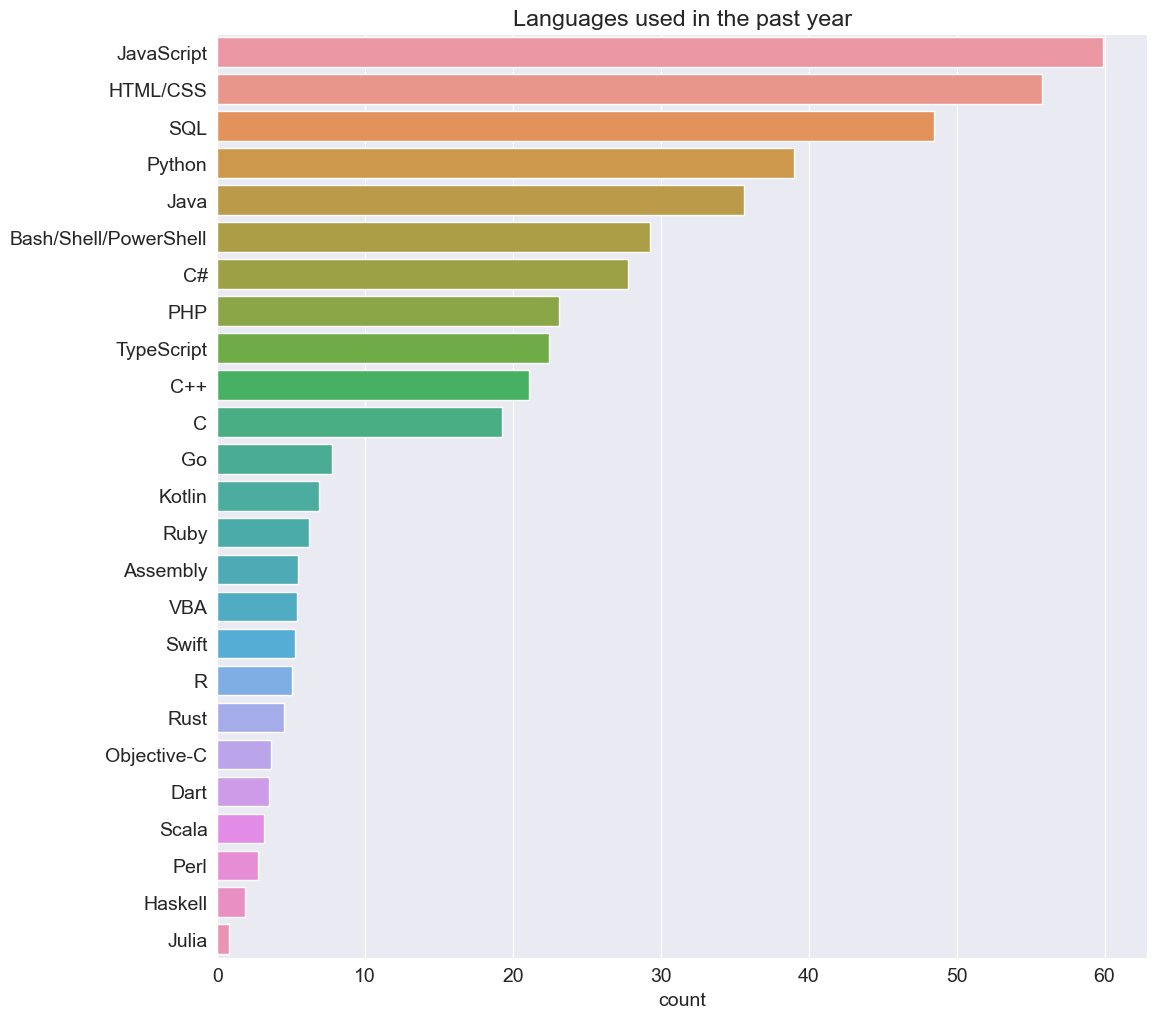

In [100]:
plt.figure(figsize=(12, 12))
sns.barplot(x=languages_worked_percentages, y=languages_worked_percentages.index)
plt.title("Languages used in the past year");
plt.xlabel('count');

 Javascript & HTML/CSS comes out at the top as web development is one of today's most sought skills. It also happens to be one of the easiest to get started. SQL is necessary for working with relational databases, so it's no surprise that most programmers work with SQL regularly. Python seems to be the popular choice for other forms of development, beating out Java, which was the industry standard for server & application development for over two decades

### Q. Which languages are the most people interested to learn over the next year?
for this we can use LanguageDesireNextYear column, with similar processing as the previous one.

In [101]:
language_interested_df = split_multicolumn(survey_df.LanguageDesireNextYear)
language_interested_percentages = language_interested_df.mean().sort_values(ascending = False) * 100
language_interested_percentages 

Python                   41.143906
JavaScript               40.425466
HTML/CSS                 32.028116
SQL                      30.799614
TypeScript               26.451653
C#                       21.058688
Java                     20.464653
Go                       19.432090
Bash/Shell/PowerShell    18.057413
Rust                     16.270643
C++                      15.014151
Kotlin                   14.760676
PHP                      10.947657
C                         9.359935
Swift                     8.692812
Dart                      7.308805
R                         6.571704
Ruby                      6.425528
Scala                     5.326097
Haskell                   4.593662
Assembly                  3.766367
Julia                     2.540976
Objective-C               2.338818
Perl                      1.761888
VBA                       1.611047
dtype: float64

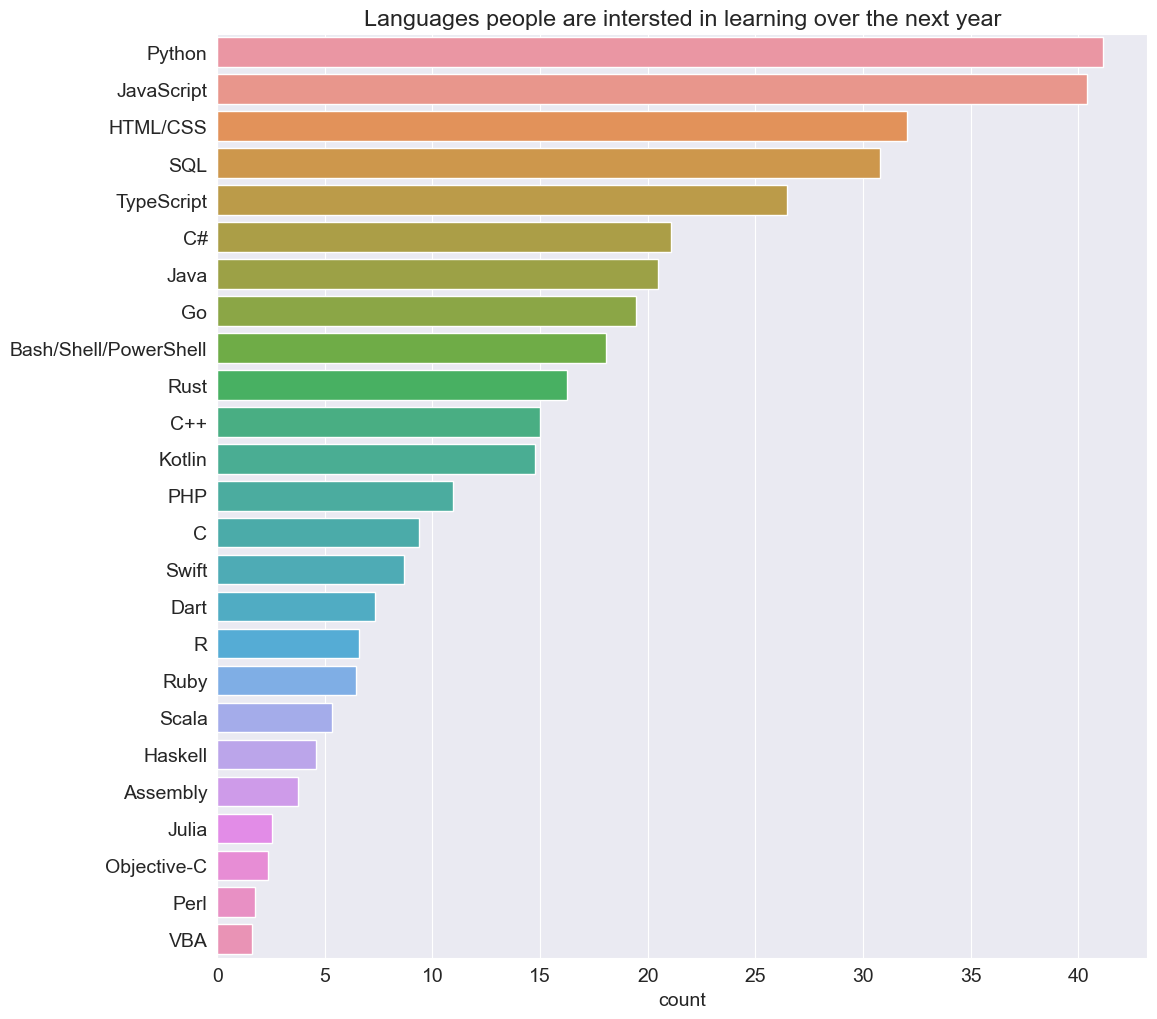

In [104]:
plt.figure(figsize=(12, 12))
sns.barplot(x=language_interested_percentages, y=language_interested_percentages.index)
plt.title("Languages people are intersted in learning over the next year");
plt.xlabel('count');

Once again, it's not surprising that Python is the language most people are interested in learning - since it is an easy-to-learn general-purpose programming language well suited for a variety of domains: application development, numerical computing, data analysis, machine learning, big data, cloud automation, web scraping, scripting, etc. We're using Python for this very analysis, so we're in good company!

### Q. which are the most loved languages i.e. a high percentage of people who have used the language want to continue learning & using it over the next year?
we'll soleve using pandas array
- create a new data frame languages_loved_df which contain true value for a language if the corresponding values in languages_worked_df and languages_intereseted_df are both true.

- Take the column-wise sum of languages_loved_df and divide it by the column-wise sum of languages_worked_df to get the percentage of respondents who "love" the language
- Sort the results in decreasing order and plot a horizontal bar graph

In [120]:
languages_loved_df = language_worked_df & language_interested_df

In [121]:
languages_loved_percentages = (languages_loved_df.sum() * 100/ language_worked_df.sum()).sort_values(ascending=False)

In [123]:
languages_loved_percentages

Rust                     86.069824
TypeScript               67.114373
Python                   66.598884
Kotlin                   62.813276
Go                       62.176789
Dart                     62.068966
Julia                    61.431412
C#                       59.623021
Swift                    59.476346
JavaScript               58.353888
SQL                      56.607710
Bash/Shell/PowerShell    53.688241
HTML/CSS                 53.494594
Scala                    53.257651
Haskell                  51.378446
R                        44.427387
Java                     44.108273
C++                      43.415820
Ruby                     42.735896
PHP                      37.232755
C                        32.983023
Assembly                 29.089352
Perl                     28.369994
Objective-C              23.133362
VBA                      19.458057
dtype: float64

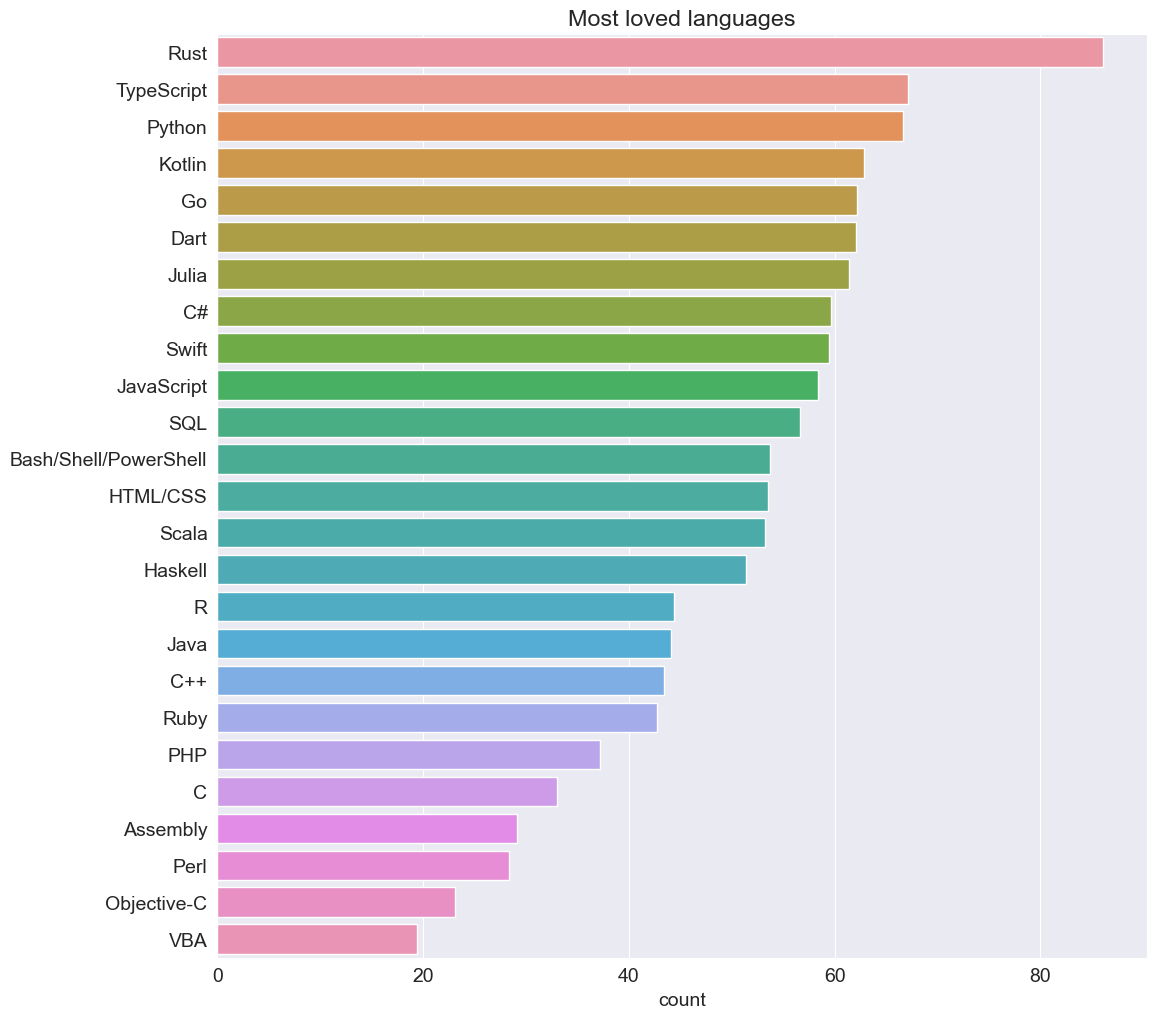

In [124]:
plt.figure(figsize=(12, 12))
sns.barplot(x=languages_loved_percentages, y=languages_loved_percentages.index)
plt.title("Most loved languages");
plt.xlabel('count');

### Q. What are the most dreaded languages, i.e., languages which people have used in the past year but do not want to learn/use over the next year.

In [125]:
languages_dreaded_df = language_worked_df & ~language_interested_df

In [126]:
languages_dreaded_percentages = (languages_dreaded_df.sum() * 100/ language_worked_df.sum()).sort_values(ascending=False)

In [127]:
languages_dreaded_percentages

VBA                      80.541943
Objective-C              76.866638
Perl                     71.630006
Assembly                 70.910648
C                        67.016977
PHP                      62.767245
Ruby                     57.264104
C++                      56.584180
Java                     55.891727
R                        55.572613
Haskell                  48.621554
Scala                    46.742349
HTML/CSS                 46.505406
Bash/Shell/PowerShell    46.311759
SQL                      43.392290
JavaScript               41.646112
Swift                    40.523654
C#                       40.376979
Julia                    38.568588
Dart                     37.931034
Go                       37.823211
Kotlin                   37.186724
Python                   33.401116
TypeScript               32.885627
Rust                     13.930176
dtype: float64

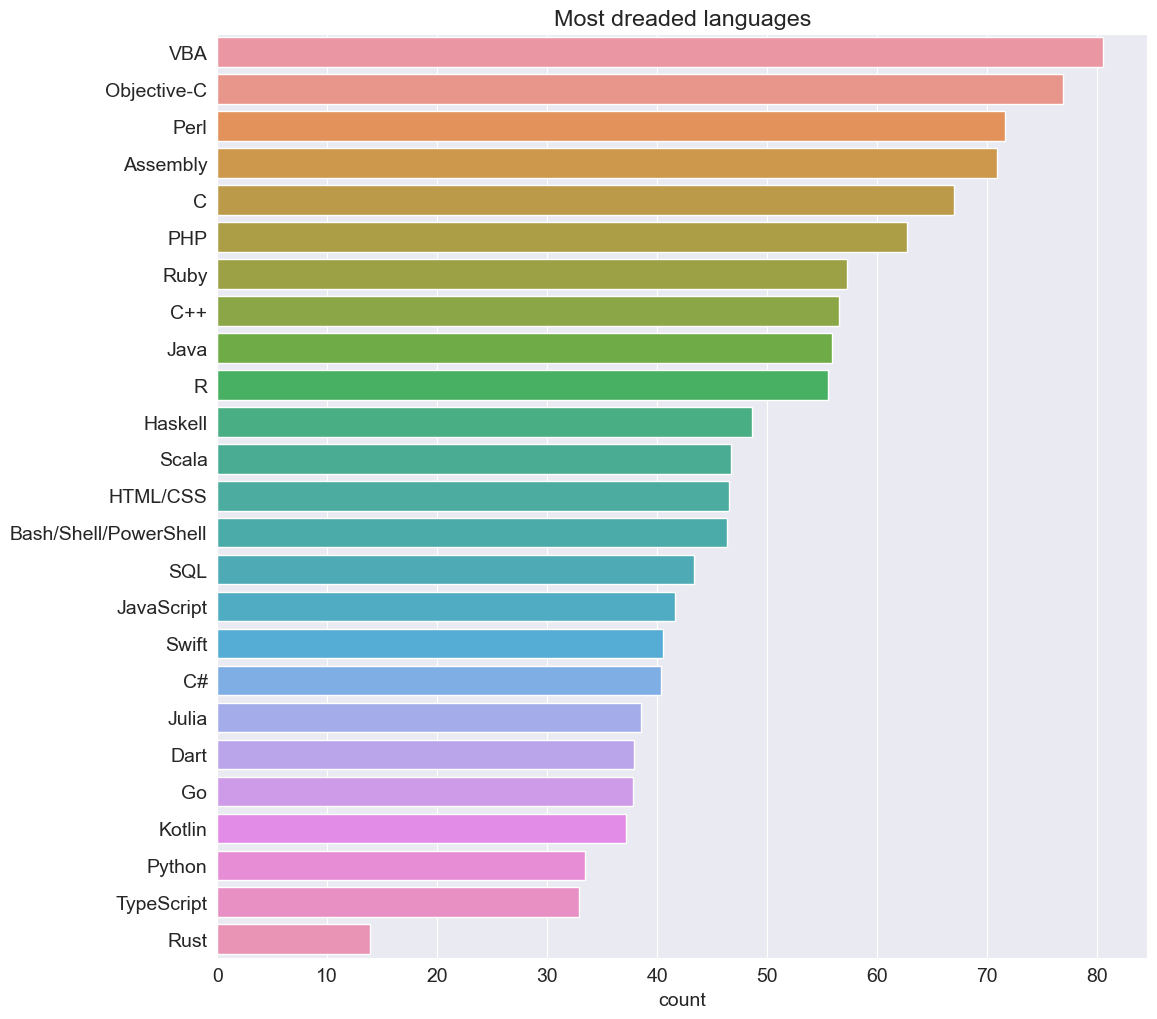

In [129]:
plt.figure(figsize=(12, 12))
sns.barplot(x=languages_dreaded_percentages, y=languages_dreaded_percentages.index)
plt.title("Most dreaded languages");
plt.xlabel('count');

### Q: In which countries do developers work the highest number of hours per week? Consider countries with more than 250 responses only.
To answer this we are going to use the groupby data frame method to aggregate the rows for each country. we'll find the results for those countries whuch have responses more than 250.

In [130]:
survey_df.groupby('Country')[['WorkWeekHrs', 'Age']].mean()

,WorkWeekHrs,Age
Country,,
Afghanistan,46.500000,23.571429
Albania,43.962963,26.766667
Algeria,36.862069,28.019608
Andorra,42.000000,39.000000
Angola,24.500000,25.500000
...,...,...
"Venezuela, Bolivarian Republic of...",40.125000,29.090909
Viet Nam,41.391667,25.786585
Yemen,40.000000,31.000000


In [131]:
countries_df = survey_df.groupby('Country')[['WorkWeekHrs', 'Age']].mean().sort_values('WorkWeekHrs', ascending = False)

In [132]:
countries_df 

,WorkWeekHrs,Age
Country,,
Kuwait,58.222222,29.111111
Iraq,52.153846,24.736842
Grenada,50.000000,NaN
Maldives,47.300000,18.666667
Afghanistan,46.500000,23.571429
...,...,...
North Korea,NaN,NaN
Saint Lucia,NaN,31.000000
Sierra Leone,NaN,27.000000


In [134]:
high_response_countries_df = countries_df.loc[survey_df.Country.value_counts() > 250].head(15)

In [135]:
high_response_countries_df 

,WorkWeekHrs,Age
Country,,
Iran,44.337748,27.521490
Israel,43.915094,32.605649
China,42.150000,26.988636
United States,41.802982,33.722058
Greece,41.402724,31.725490
Viet Nam,41.391667,25.786585
South Africa,41.023460,32.127027
Turkey,40.982143,29.522772
Sri Lanka,40.612245,26.965714


### Q.How important is it to start young to build a career in programming?
Let's create a scatter plot of Age vs. YearsCodePro (i.e., years of coding experience) to answer this question.

In [136]:
schema.YearsCodePro

'NOT including education, how many years have you coded professionally (as a part of your work)?'

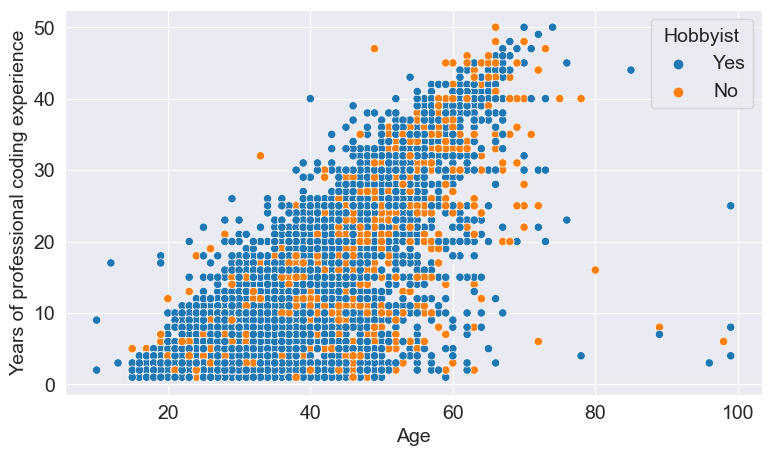

In [138]:
sns.scatterplot(x='Age', y='YearsCodePro', hue='Hobbyist', data=survey_df)
plt.xlabel("Age")
plt.ylabel("Years of professional coding experience");

This graph indicates that you can start programming professionally at any age

when people tried programming for the first time

C:\Users\Admin\AppData\Local\Temp\ipykernel_9208\3582527176.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(survey_df.Age1stCode)


<Axes: title={'center': 'At what age did you write your first line of code or program? (e.g., webpage, Hello World, Scratch project)'}, xlabel='Age1stCode', ylabel='Density'>

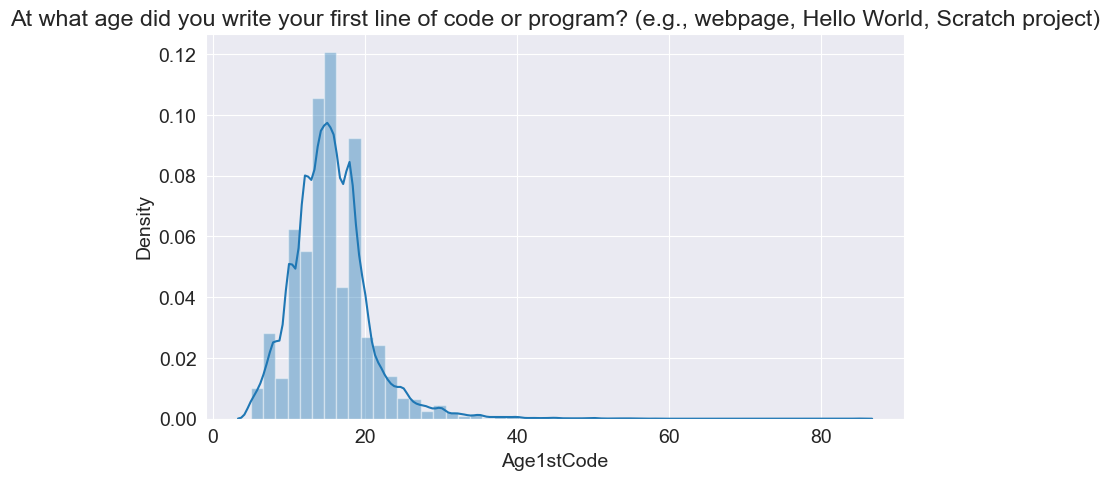

In [143]:
plt.title(schema.Age1stCode)
sns.distplot(survey_df.Age1stCode)

<Axes: title={'center': 'At what age did you write your first line of code or program? (e.g., webpage, Hello World, Scratch project)'}, xlabel='Age1stCode', ylabel='Count'>

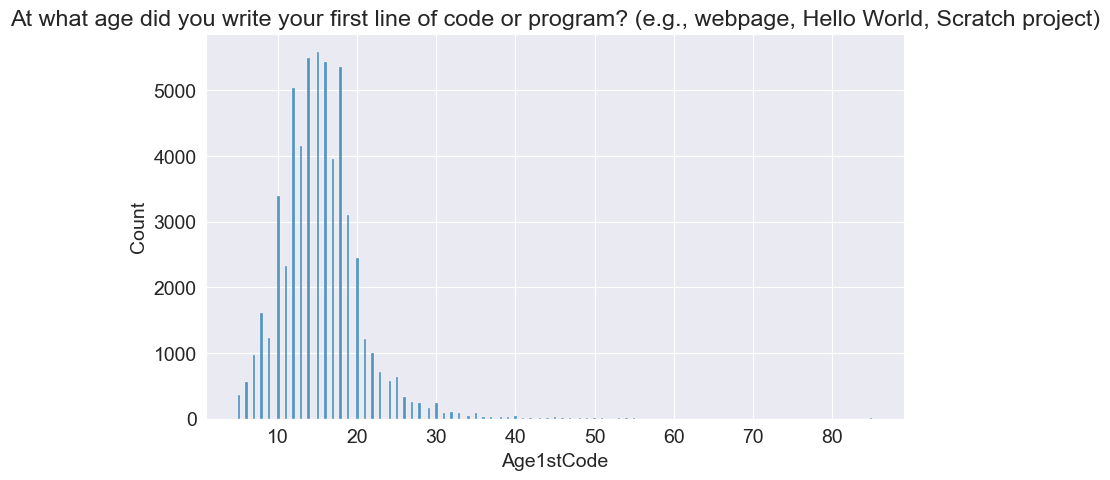

In [144]:
plt.title(schema.Age1stCode)
sns.histplot(survey_df.Age1stCode)